In [21]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#create file variable for data set
file = "new_data_2.csv"
#read in csv file
df = pd.read_csv(file)
#show a snip of the data
df.head()

,Unnamed: 0,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter
0,0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1
1,1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2
2,2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2
3,3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4
4,4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4


In [23]:
#remove unnamed 0 column
df.drop(columns=df.columns[0], axis=1, inplace = True)
df.head()

,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter
0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1
1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2
2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2
3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4
4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4


In [24]:
#see the data types by column
df.dtypes

name                    object
popularity               int64
duration_in_seconds    float64
explicit                 int64
artists                 object
release_date            object
danceability           float64
energy                 float64
loudness               float64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
month                   object
year                     int64
quarter                 object
dtype: object

In [31]:
grouped_avg = df.groupby("year").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
grouped_avg

,danceability,energy,speechiness,acousticness,valence,explicit
year,,,,,,
2015,0.598816,0.650896,0.084369,0.293570,0.508292,0.102785
2016,0.607457,0.658413,0.093959,0.282334,0.495939,0.125638
2017,0.625758,0.659662,0.100114,0.278274,0.493427,0.172290
2018,0.635623,0.653849,0.105013,0.276002,0.482426,0.190201
2019,0.650893,0.636790,0.110389,0.293986,0.493060,0.216755
2020,0.658587,0.639914,0.111564,0.271072,0.501836,0.219853
2021,0.668219,0.608707,0.126650,0.288460,0.495748,0.275410


<AxesSubplot:xlabel='year'>

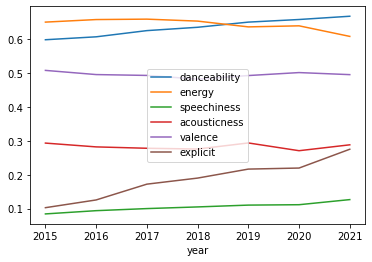

In [32]:
grouped_avg.plot()

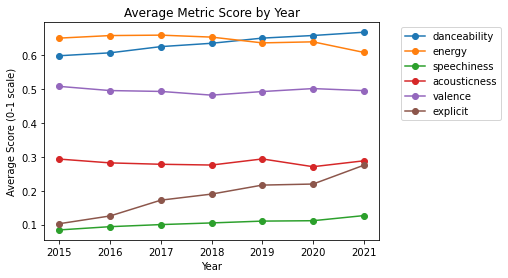

In [44]:
plt.plot(grouped_avg,marker ="o")
plt.xlabel("Year")
plt.ylabel("Average Score (0-1 scale)")
plt.title("Average Metric Score by Year")
plt.legend(["danceability", "energy", "speechiness", "acousticness", "valence", "explicit"],bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
#danceability increasing, energy decreasing, explicit increasing. 3 factors to dig into more

In [49]:
conditions = [df["year"] <=2019, df["year"] >= 2020]
values = ["pre-covid", "covid"]
df["time_period"] = np.select(conditions, values)
df.head()

,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter,time_period
0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1,covid
1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2,pre-covid
2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2,pre-covid
3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4,covid
4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4,covid


<AxesSubplot:xlabel='time_period'>

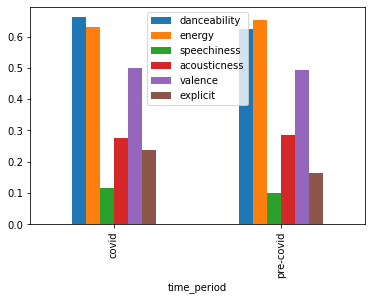

In [54]:
tp_group = df.groupby("time_period").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
tp_group.plot(kind="bar")

In [ ]:
#null hypothesis - danceability scores of songs released did not increase by a statistically\
# significant margin during the covid period (defined as 1/1/20 - 4/30/21)\
# as compared to the control period (1/1/15 - 12/31/19) 
#alt hypothesis - danceability scores of songs released increased by a statistically \
# significant margin during the covid period (defined as 1/1/20 - 4/30/21) as compared\
# to the control period (1/1/15 - 12/31/19)

In [ ]:
#ask shaun - independent t test, create two dfs of covid and precovid and compare those dfs so i'm not using means?